In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.interpolate import CubicSpline

In [4]:
df = pd.read_csv('./data/master_df.csv', index_col=0)

## Cleaning and Formatting

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d')
# Convert necessary columns to numeric types, handle missing values if needed
df['dep_delay'] = pd.to_numeric(df['dep_delay'], errors='coerce')
df['arr_delay'] = pd.to_numeric(df['arr_delay'], errors='coerce')
df['precipitation_mm'] = pd.to_numeric(df['precipitation_mm'], errors='coerce')
df['max_snow_mm'] = pd.to_numeric(df['max_snow_mm'], errors='coerce')
df['avg_wind_speed_kmh'] = pd.to_numeric(df['avg_wind_speed_kmh'], errors='coerce')
df['avg_pressure_hpa'] = pd.to_numeric(df['avg_pressure_hpa'], errors='coerce')
df['avg_temp_c'] = pd.to_numeric(df['avg_temp_c'], errors='coerce')
df['min_temp_c'] = pd.to_numeric(df['min_temp_c'], errors='coerce')
df['max_temp_c'] = pd.to_numeric(df['max_temp_c'], errors='coerce')
df['avg_wind_direction'] = pd.to_numeric(df['avg_wind_direction'], errors='coerce')
df['wind_peakgust_kmh'] = pd.to_numeric(df['wind_peakgust_kmh'], errors='coerce')

In [4]:
df.head()

,date,sched_dep_time,actual_dep_time,dep_delay,sched_arr_time,actual_arr_time,arr_delay,airline,tail_number,flight_number,...,diverted,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,max_snow_mm,avg_wind_direction,avg_wind_speed_kmh,wind_peakgust_kmh,avg_pressure_hpa
0,2014-10-01,09:00:00,08:54:00,-6.0,12:10:00,12:02:00,-8.0,AA,N785AA,1,...,0,17.7,16.7,19.4,0.0,0,22.0,18.4,NaN,1016.8
1,2014-10-02,09:00:00,08:54:00,-6.0,12:10:00,12:07:00,-3.0,AA,N783AA,1,...,0,17.4,16.1,20.0,0.0,0,NaN,13.3,NaN,1019.9
2,2014-10-03,09:00:00,08:55:00,-5.0,12:10:00,11:45:00,-25.0,AA,N786AA,1,...,0,16.8,12.8,20.0,0.0,0,89.0,11.5,NaN,1017.2
3,2014-10-04,09:00:00,08:52:00,-8.0,12:10:00,12:03:00,-7.0,AA,N784AA,1,...,0,18.8,11.1,22.2,17.8,0,175.0,26.3,NaN,1004.1
4,2014-10-05,09:00:00,08:57:00,-3.0,12:10:00,12:18:00,8.0,AA,N792AA,1,...,0,12.7,8.3,16.1,0.0,0,273.0,20.9,NaN,1010.7


## 1. Can we see the event in the flight data?
For this, we will plot a line chart for the month of January, which is when the snow storm happened. 

C:\Users\fatim\AppData\Local\Temp\ipykernel_31640\295328005.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=period_df, x='date', y='max_snow_mm', hue='airport_code',


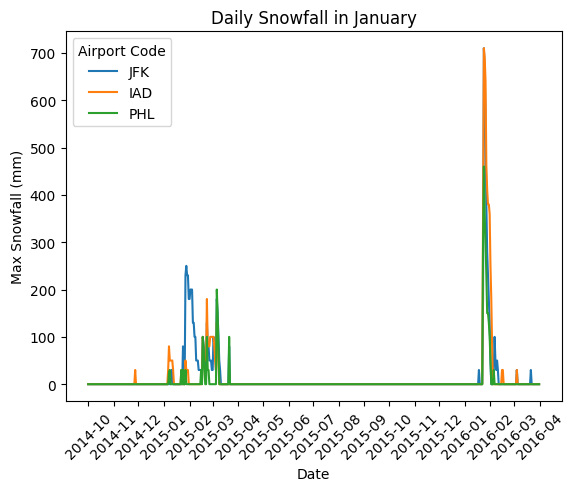

In [5]:
# Define the period
start_date = '2014-10-01'
end_date = '2016-04-30'

# Filter data for the period
period_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Seaborn lineplot with KDE smoothing
colors = ['blue', 'green', 'red'] 
sns.lineplot(data=period_df, x='date', y='max_snow_mm', hue='airport_code', 
             estimator='mean', ci=None, marker='', color=colors);

# Formatting the x-axis to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adding title and labels
plt.title('Daily Snowfall in January')
plt.xlabel('Date')
plt.ylabel('Max Snowfall (mm)')
plt.legend(title='Airport Code')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show();

**Observation:** We can see that snow levels were high during the last weeks of January, when the blizzard occured.

## 2. Comparison with Previous Winters

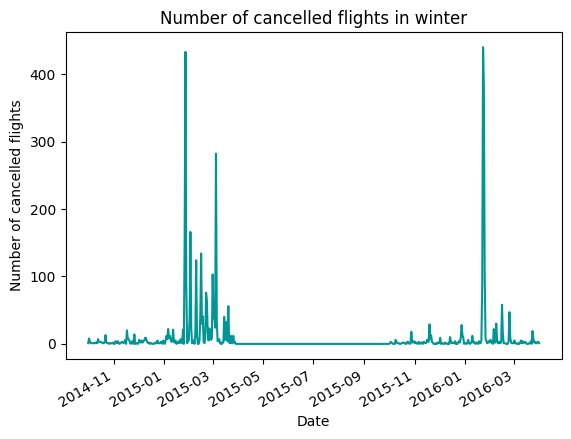

In [7]:
cancelled_flights = df.groupby('date')['cancelled'].sum()
cancelled_flights.plot(kind='line', marker='', color='#009696');
plt.title('Number of cancelled flights in winter')
plt.xlabel('Date')
plt.ylabel('Number of cancelled flights')
plt.show();

## 3. Correlation with other Weather Variables

### _Correlation Matrix_

C:\Users\fatim\AppData\Local\Temp\ipykernel_31640\3981199984.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cancelled'] = df_selected['cancelled'].astype(bool)


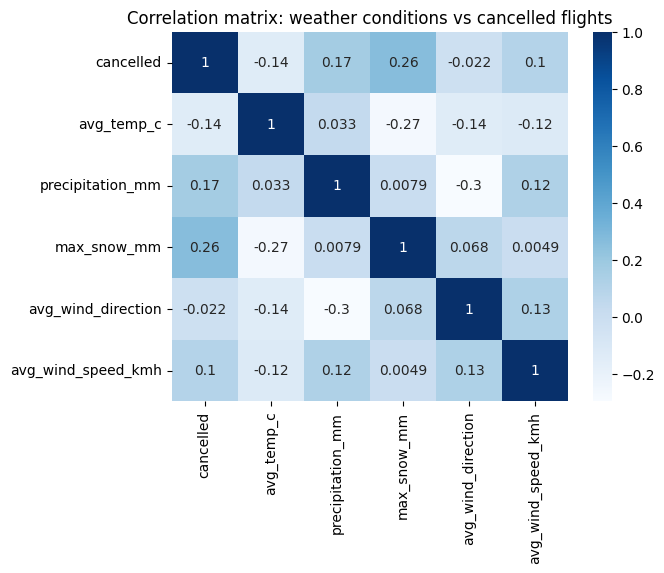

In [6]:
# Select the desired columns
selected_columns = ['cancelled','avg_temp_c','precipitation_mm','max_snow_mm','avg_wind_direction','avg_wind_speed_kmh']
df_selected = df[selected_columns]  # Select the columns from your DataFrame

# Convert 'cancelled' to boolean (assuming it has 0s and 1s)
df_selected['cancelled'] = df_selected['cancelled'].astype(bool)

# Calculate correlation matrix
correlation_matrix = df_selected.corr();

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Blues');
plt.title('Correlation matrix: weather conditions vs cancelled flights');
plt.show();

**Observation:** Data does not show a high correlation with other weather variables and flight cancellations. Even the correlation of snow vs. flights is weak at only 2.6. This means that our particular event was an extreme case. 

### _Relationships with Flight Delays_
It is possible that flights do not get totally cancelled by extreme weather events, but rather delayed until the conditions are better. 

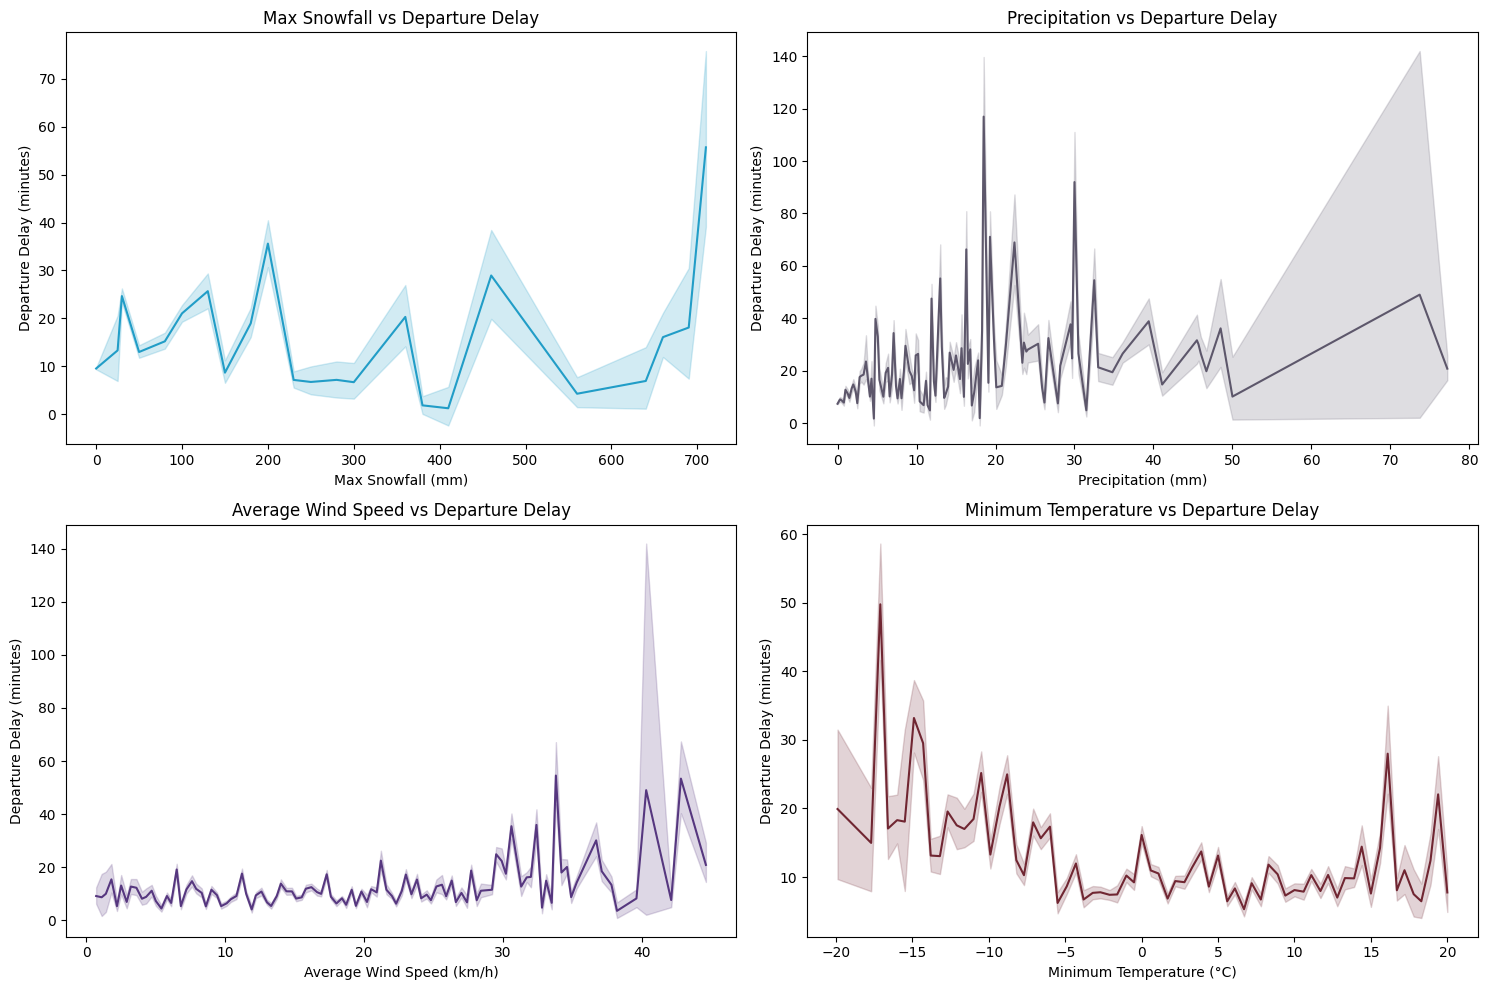

In [8]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: max_snow_mm vs dep_delay
sns.lineplot(x='max_snow_mm', y='dep_delay', data=df, ax=axes[0, 0], color='#219dc7', linestyle='-', markers=False)
axes[0, 0].set_title('Max Snowfall vs Departure Delay')
axes[0, 0].set_xlabel('Max Snowfall (mm)')
axes[0, 0].set_ylabel('Departure Delay (minutes)')

# Plot 2: precipitation_mm vs dep_delay
sns.lineplot(x='precipitation_mm', y='dep_delay', data=df, ax=axes[0, 1], markers=False, color='#5d576b')
axes[0, 1].set_title('Precipitation vs Departure Delay')
axes[0, 1].set_xlabel('Precipitation (mm)')
axes[0, 1].set_ylabel('Departure Delay (minutes)')

# Plot 3: avg_wind_speed_kmh vs dep_delay
sns.lineplot(x='avg_wind_speed_kmh', y='dep_delay', data=df, ax=axes[1, 0], markers='False', color='#56377f')
axes[1, 0].set_title('Average Wind Speed vs Departure Delay')
axes[1, 0].set_xlabel('Average Wind Speed (km/h)')
axes[1, 0].set_ylabel('Departure Delay (minutes)')

# Plot 4: min_temp_c vs dep_delay
sns.lineplot(x='min_temp_c', y='dep_delay', data=df, ax=axes[1, 1], markers=False, color='#702632')
axes[1, 1].set_title('Minimum Temperature vs Departure Delay')
axes[1, 1].set_xlabel('Minimum Temperature (°C)')
axes[1, 1].set_ylabel('Departure Delay (minutes)')

# Adjust layout to prevent overlap
plt.tight_layout()

## 4. Correlation Between Severe Snow and Length of Flight Delays

### _T-Testing_

In [84]:
import scipy.stats as stats

# Define high and low thresholds for each weather parameter
snow_threshold = 100
temp_threshold = -10

# Segment the data based on the thresholds
high_snow = df[df['max_snow_mm'] > snow_threshold]
low_snow = df[df['max_snow_mm'] <= snow_threshold]


high_temp = df[df['min_temp_c'] > temp_threshold]
low_temp = df[df['min_temp_c'] <= temp_threshold]

# Sample data if needed
high_snow_sample = high_snow.sample(n=min(1000, len(high_snow)), replace=False, random_state=1)
low_snow_sample = low_snow.sample(n=min(1000, len(low_snow)), replace=False, random_state=1)

high_temp_sample = high_temp.sample(n=min(1000, len(high_temp)), replace=False, random_state=1)
low_temp_sample = low_temp.sample(n=min(1000, len(low_temp)), replace=False, random_state=1)

# Perform t-tests
snow_ttest = stats.ttest_ind(high_snow_sample['dep_delay'], low_snow_sample['dep_delay'], nan_policy='omit', equal_var=False)
temp_ttest = stats.ttest_ind(high_temp_sample['dep_delay'], low_temp_sample['dep_delay'], nan_policy='omit', equal_var=False)

# Print results
print("Snow T-test:", snow_ttest)
print("Temperature T-test:", temp_ttest)

Snow T-test: TtestResult(statistic=np.float64(2.7166733445708746), pvalue=np.float64(0.006665420358538541), df=np.float64(1595.1733206724828))
Temperature T-test: TtestResult(statistic=np.float64(-3.8813938063202773), pvalue=np.float64(0.00010742217087238494), df=np.float64(1891.103972096614))


**Observations:**
- Snow T-test: 
    - A higher absolute value of the t-statistic indicates a larger difference between the groups being compared. In this case, a t-statistic of 2.7166733445708746 suggests a significant difference between the groups.
    - A p-value of 0.006665420358538541 is quite small, much less than the significance level of 0.05. This suggests that the observed difference in flight delays between high and low snowfall groups is statistically significant. Supports our hypothesis.
- Min Temperatures: 
    - A t-statistic of -3.881 indicates a substantial difference between the flight delays in high and low temperature conditions.
    - A p-value of 0.000107 is much smaller than the common significance level of 0.05, indicating that the difference observed is statistically significant.

### _Plotting_

C:\Users\fatim\AppData\Local\Temp\ipykernel_15096\1272172979.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Snowfall Condition', y='Average Departure Delay (minutes)', data=plot_data, palette='viridis')


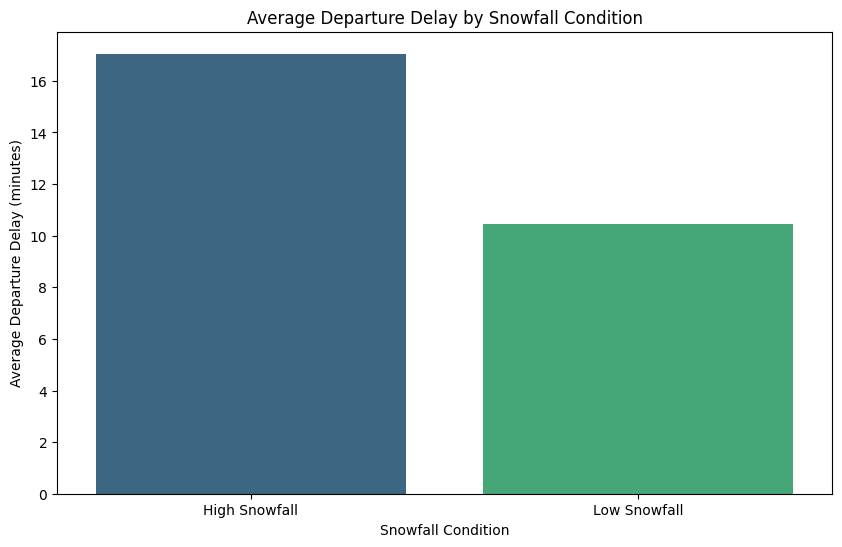

In [80]:
avg_delay_high_snow = high_snow['dep_delay'].mean()
avg_delay_low_snow = low_snow['dep_delay'].mean()

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Snowfall Condition': ['High Snowfall', 'Low Snowfall'],
    'Average Departure Delay (minutes)': [avg_delay_high_snow, avg_delay_low_snow]
})

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Snowfall Condition', y='Average Departure Delay (minutes)', data=plot_data, palette='viridis')
plt.title('Average Departure Delay by Snowfall Condition')
plt.xlabel('Snowfall Condition')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

-----